Перевод сгенерированных ChatGPT последовательностей в музыкальные данные

In [1]:
from music21 import *

In [15]:
sample_1 = 'D4,0.5 E4,0.5 F4,1.0 G4,0.5 A4,0.5 B4,1.0 C5,0.5 B4,0.5 A4,1.0 G4,0.5 F4,0.5 E4,1.0 D4,0.5 E4,0.5 F4,1.0 G4,0.5 A4,0.5 B4,1.0 C5,0.5 B4,0.5 A4,1.0 G4,0.5 F4,0.5 E4,1.0 D4,0.5 E4,0.5 F4,1.0 G4,0.5 A4,0.5 B4,1.0 C5,0.5 B4,0.5 A4,1.0 G4,0.5 F4,0.5 E4,1.0 D4,0.5 E4,0.5 F4,1.0 G4,0.5 A4,0.5 B4,1.0 C5,0.5 B4,0.5 A4,1.0 G4,0.5 F4,0.5 E4,1.0'
sample_2 = 'G3,0.5 A3,0.5 B3,1.0 C4,0.5 D4,0.5 E4,1.0 F4,0.5 G4,0.5 A4,1.0 B4,0.5 C5,0.5 D5,1.0 E5,0.5 F#5,0.5 G5,1.0 A5,0.5 B5,0.5 C6,1.0 B5,0.5 A5,0.5 G5,1.0 F#5,0.5 E5,0.5 D5,1.0 C5,0.5 B4,0.5 A4,1.0 G4,0.5 F#4,0.5 E4,1.0 D4,0.5 C4,0.5 B3,1.0 A3,0.5 G3,0.5 F#3,1.0 G3,0.5 A3,0.5 B3,1.0 C4,0.5 D4,0.5 E4,1.0 F4,0.5 G4,0.5'
sample_3 = 'A2,0.5 B2,0.5 C3,1.0 D3,0.5 E3,0.5 F3,1.0 G3,0.5 A3,0.5 B3,1.0 C4,0.5 D4,0.5 E4,1.0 F4,0.5 G4,0.5 A4,1.0 B4,0.5 C5,0.5 D5,1.0 E5,0.5 F#5,0.5 G5,1.0 A5,0.5 B5,0.5 C6,1.0 B5,0.5 A5,0.5 G5,1.0 F#5,0.5 E5,0.5 D5,1.0 C5,0.5 B4,0.5 A4,1.0 G4,0.5 F#4,0.5 E4,1.0 D4,0.5 C4,0.5 B3,1.0 A3,0.5 G3,0.5 F#3,1.0 G3,0.5 A3,0.5 B3,1.0 C4,0.5 D4,0.5 E4,1.0 F4,0.5 G4,0.5'
samples = [sample_1, sample_2, sample_3]

In [16]:

def create_midi(note_text_seq, dur_text_seq):
    midi_stream = stream.Stream()
    for note_pattern, duration_pattern in zip(note_text_seq, dur_text_seq):
        # аккорд
        if ('.' in note_pattern):
            notes_in_chord = note_pattern.split('.')
            chord_notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(current_note)
                new_note.duration = duration.Duration(duration_pattern)
                new_note.storedInstrument = instrument.Violoncello()
                chord_notes.append(new_note)
            new_chord = chord.Chord(chord_notes)
            midi_stream.append(new_chord)
        elif note_pattern == 'rest':
        # пауза
            new_note = note.Rest()
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            midi_stream.append(new_note)
        elif note_pattern != '<START>':
        # нота
            new_note = note.Note(note_pattern)
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Violoncello()
            midi_stream.append(new_note)
    return midi_stream

In [17]:
def note_and_seq(input_str):
    notes_seqs = input_str.split(' ')
    notes = []
    seqs = []
    for elem in notes_seqs:
        n, s = elem.split(',')
        notes.append(n)
        seqs.append(float(s))
    return notes, seqs

In [18]:
for i in range(len(samples)):  
    n,d = note_and_seq(samples[i])
    midi_result = create_midi(n,d)
    midi_result.write('midi',fp = f'gpt_cello{i}.mid')

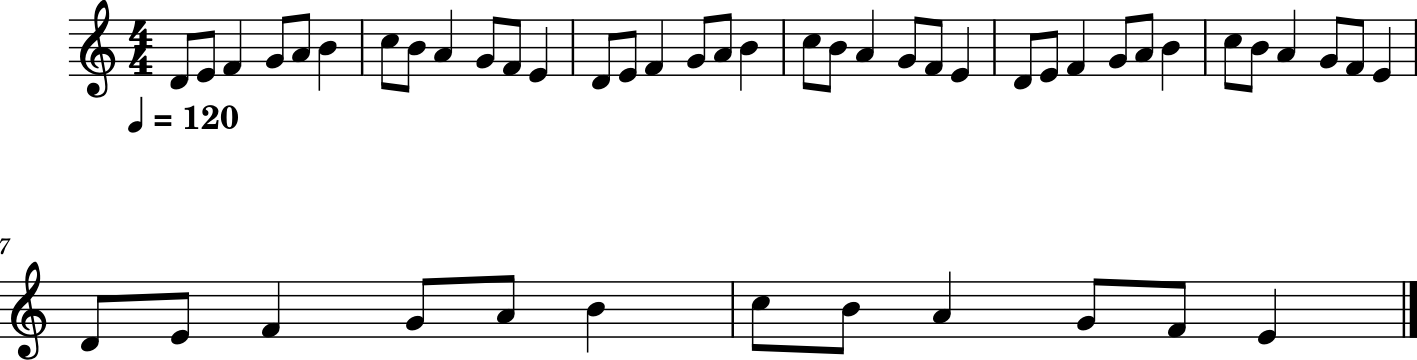

In [2]:
a = converter.parse(f'gpt_cello{0}.mid')
a.show()